In [9]:
# list all data in history of model training
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


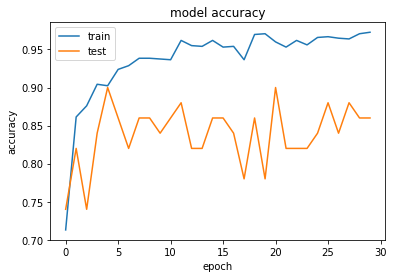

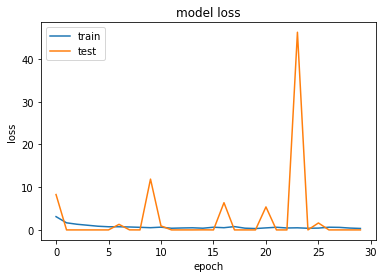

In [11]:
# Visualize training history
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
# Loading the saved model
from keras.models import load_model
model = load_model('BTD/BTD_VGG19_version06')

C:\Users\naikp\Anaconda3\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [8]:
# Making a single prediction
from keras.preprocessing import image
import numpy as np

test_image=image.load_img('BTD/TEST_new/YES/Y102.jpg',target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result[0][0]>= 0.5:
    prediction='tumor detected'
else:
    prediction='No tumor'
print(prediction)
print(result)

tumor detected
[[1.]]


In [7]:
# directories
TRAIN_new = 'BTD/TRAIN_new/'
TEST_new = 'BTD/TEST_new/'
VAL_new = 'BTD/VAL_new/'

In [5]:
# function for splitting data into X(img), y(label) for prediction for a given set
from keras.preprocessing import image
import numpy as np
import os

def load_data(directory):
        features, labels = [], []
        input1, output = [], []
        for class_name in os.listdir(directory):
                    for img_name in os.listdir(directory + class_name):
                        img=image.load_img(os.path.join(directory, class_name, img_name), target_size=(224,224))
                        img=image.img_to_array(img)
                        img=np.expand_dims(img,axis=0)
                        input1.append(img)
                        output.append(class_name)  # or other method to convert label

        # Shuffle labels.
        combine = list(zip(input1, output))  # zip as list 
        np.random.shuffle(combine)
        input1, output = zip(*combine)  # unzipping
        features.append(input1)
        labels.append(output)

        return [np.array(features),
                 np.array(labels)]

In [8]:
# Applying above function on test and validation sets
(X_val, y_val) = load_data(VAL_new)
(X_test, y_test) = load_data(TEST_new)

In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
lb2 = LabelEncoder()

Y_val = lb1.fit_transform(y_val[0])
Y_test = lb2.fit_transform(y_test[0])

In [11]:
# Changing the shape as per model's input requirement for prediction
X_test = np.vstack(X_test)
X_val = np.vstack(X_val)
print(X_test.shape)
print(X_val.shape)

(10, 224, 224, 3)
(50, 224, 224, 3)


% Test Accuracy =  90.0


Text(0.5, 1.0, 'Confusion Matrix for test set')

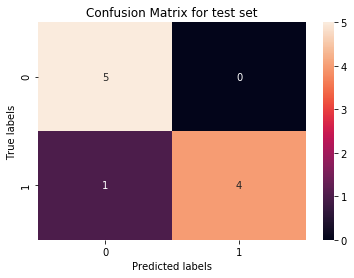

In [14]:
# validate on test set (set of 10 images)
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

pred_test = model.predict_classes(X_test, batch_size=10)

accuracy_test = accuracy_score(Y_test, pred_test)
print('% Test Accuracy = ', accuracy_test*100)

cm_test = confusion_matrix(Y_test, pred_test) 
#print('\n Confusion Matrix--> \n',cm_test)

ax = sns.heatmap(cm_test, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test set')

% Validation Accuracy =  88.0


Text(0.5, 1.0, 'Confusion Matrix for validation set')

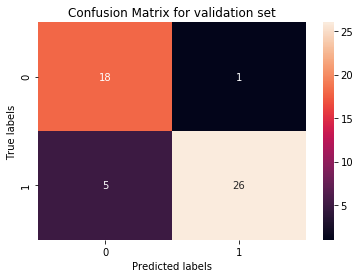

In [15]:
# validate on validation set
pred_val = model.predict_classes(X_val, batch_size=50)

accuracy_val = accuracy_score(Y_val, pred_val)
print('% Validation Accuracy = ', accuracy_val*100)

cm_val = confusion_matrix(Y_val, pred_val) 
#print('\n Confusion Matrix --> \n',cm_val)

ax = sns.heatmap(cm_val, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for validation set')